<class 'pandas.core.frame.DataFrame'>
Index: 1292 entries, 2 to 4125
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   1                                      1292 non-null   int64  
 1   STATE ABBREVIATION                     1292 non-null   object 
 2   STATE                                  1292 non-null   object 
 3   D                                      1292 non-null   object 
 4   FEC ID#                                1292 non-null   object 
 5   (I)                                    440 non-null    object 
 6   CANDIDATE NAME (First)                 1292 non-null   object 
 7   CANDIDATE NAME (Last)                  1292 non-null   object 
 8   CANDIDATE NAME                         1292 non-null   object 
 9   TOTAL VOTES                            0 non-null      object 
 10  PARTY                                  1292 non-null   object 
 11  PRIMARY V

None

,1,STATE ABBREVIATION,STATE,D,FEC ID#,(I),CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,...,RUNOFF VOTES,RUNOFF %,GENERAL VOTES,GENERAL %,GE RUNOFF ELECTION VOTES (LA),GE RUNOFF ELECTION % (LA),"COMBINED GE PARTY TOTALS (CT, NY, SC)","COMBINED % (CT, NY, SC)",GE WINNER INDICATOR,FOOTNOTES
2,4,AL,Alabama,1,H4AL01123,(I),Bradley,Byrne,"Byrne, Bradley",NaN,...,NaN,NaN,208083,0.963825,NaN,NaN,NaN,NaN,W,NaN
8,10,AL,Alabama,2,H0AL02087,(I),Martha,Roby,"Roby, Martha",NaN,...,NaN,NaN,134886,0.487685,NaN,NaN,NaN,NaN,W,NaN
12,14,AL,Alabama,2,H6AL02167,NaN,Nathan,Mathis,"Mathis, Nathan",NaN,...,NaN,NaN,112089,0.405262,NaN,NaN,NaN,NaN,NaN,NaN
16,18,AL,Alabama,3,H2AL03032,(I),Mike,Rogers,"Rogers, Mike",NaN,...,NaN,NaN,192164,0.669318,NaN,NaN,NaN,NaN,W,NaN
19,21,AL,Alabama,3,H4AL03061,NaN,Jesse,Smith,"Smith, Jesse",NaN,...,NaN,NaN,94549,0.329320,NaN,NaN,NaN,NaN,NaN,NaN


,state_abbr,state,district,fec_id,first_name,last_name,name,party,votes,vote_share,winner
2,AL,Alabama,1,H4AL01123,bradley,byrne,bradley byrne,Republican,208083,0.963825,1
8,AL,Alabama,2,H0AL02087,martha,roby,martha roby,Republican,134886,0.487685,1
12,AL,Alabama,2,H6AL02167,nathan,mathis,nathan mathis,Democrat,112089,0.405262,0
16,AL,Alabama,3,H2AL03032,mike,rogers,mike rogers,Republican,192164,0.669318,1
19,AL,Alabama,3,H4AL03061,jesse,smith,jesse smith,Democrat,94549,0.329320,0


(1288, 11)

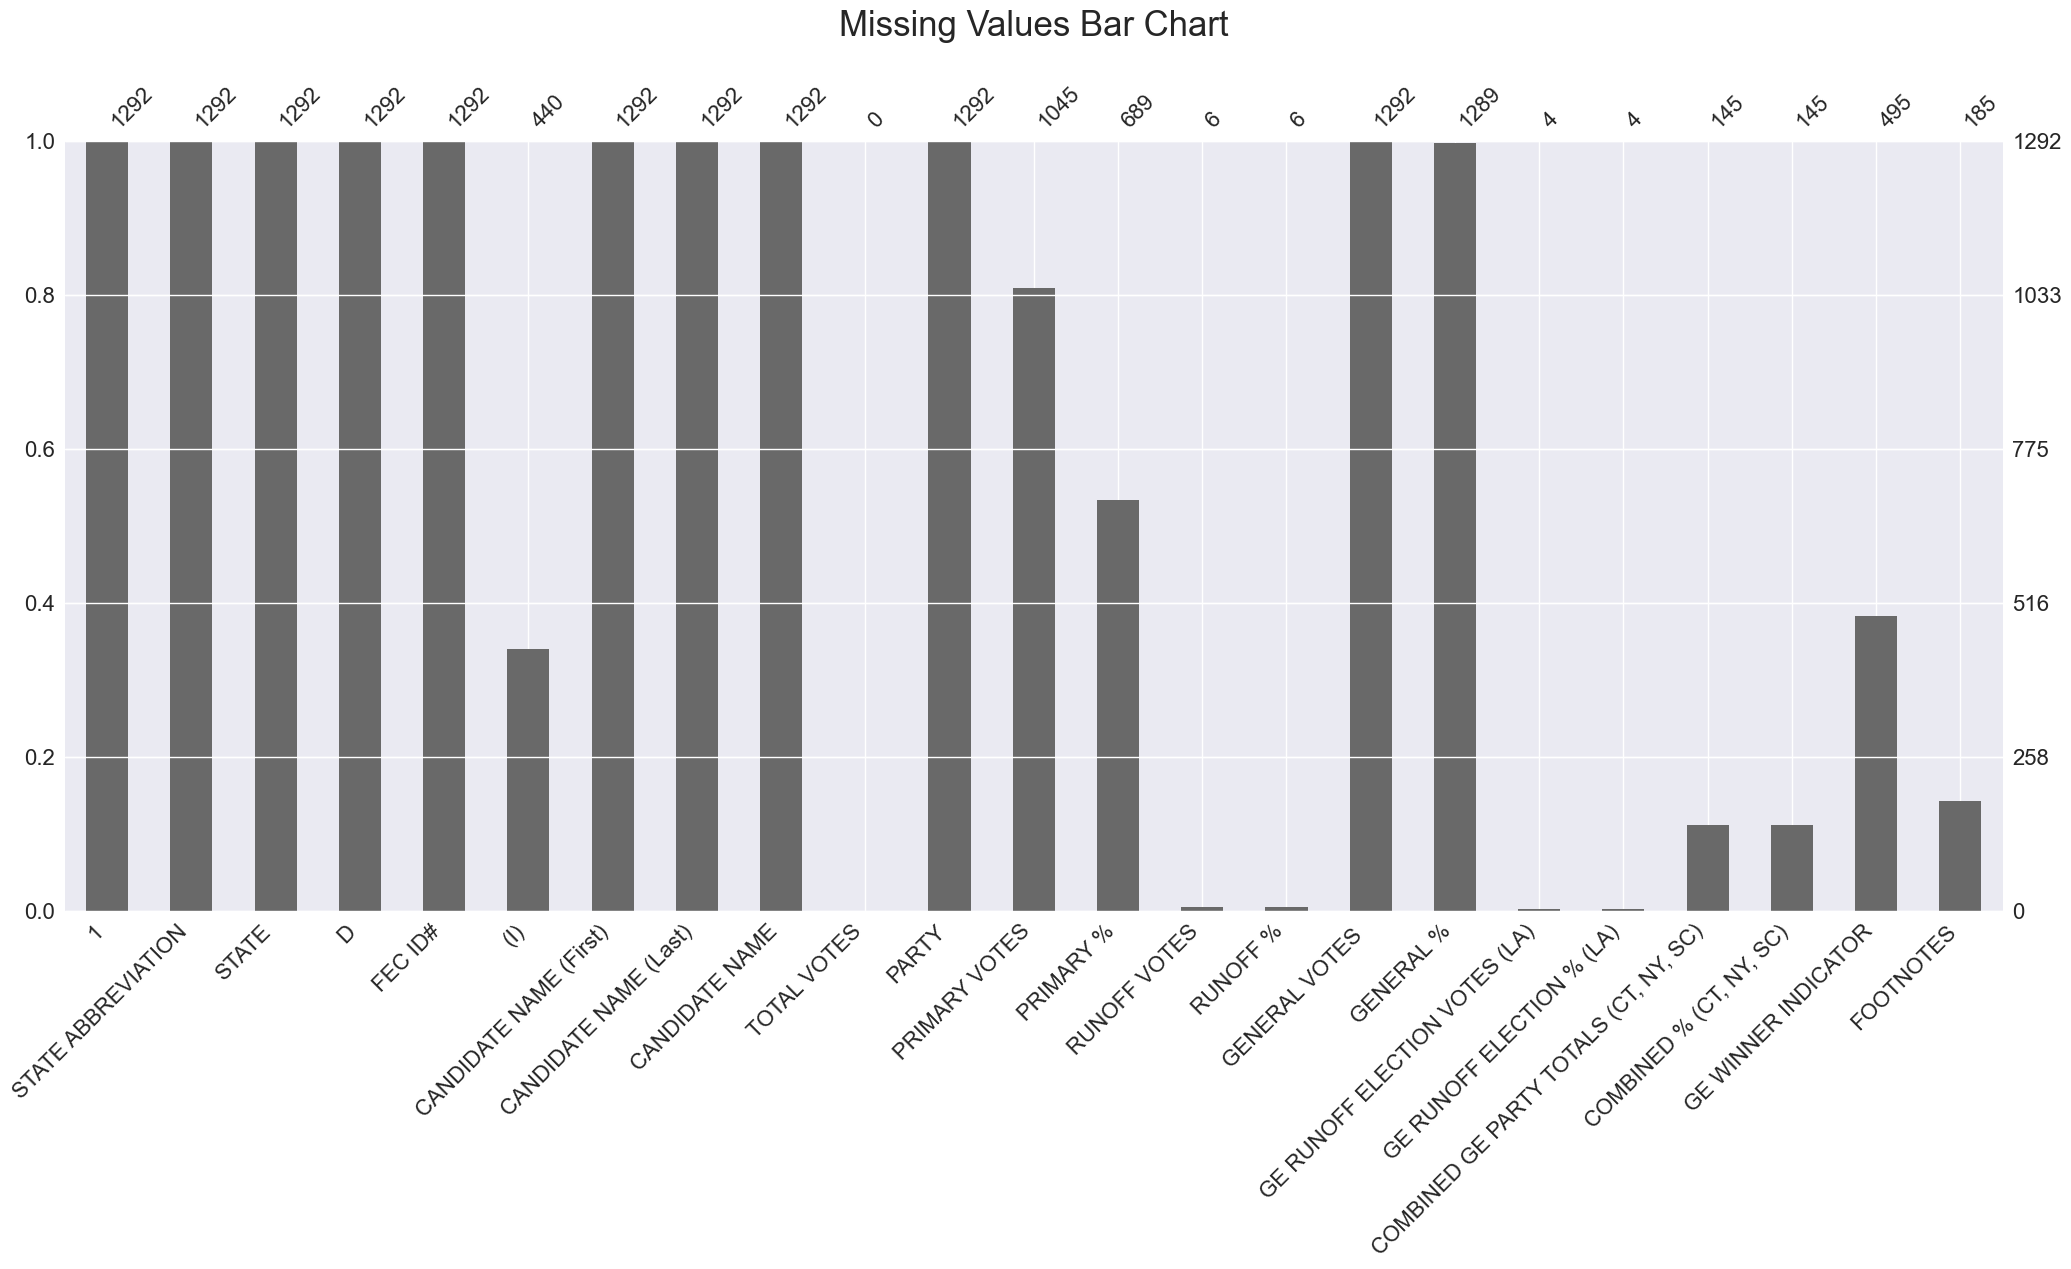

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
from name_cleaner import clean_names
plt.style.use('seaborn-v0_8')
from warnings import simplefilter
simplefilter('ignore')

df = pd.read_csv('../data/raw/house_election_results_2016_fec_raw.csv', encoding='utf-8')

df.dropna(subset=['STATE ABBREVIATION', 'CANDIDATE NAME', 'CANDIDATE NAME (First)','GENERAL VOTES ', 'FEC ID#'], inplace=True)

df = df[~df.eq('Scattered').any(axis='columns')]

display(df.info(), df.head())

msno.bar(df)        
plt.title('Missing Values Bar Chart\n', fontsize=25)

column_mapping = {'STATE ABBREVIATION':'state_abbr','STATE':'state','D':'district','FEC ID#':'fec_id','CANDIDATE NAME (First)':'first_name',
                  'CANDIDATE NAME (Last)':'last_name','CANDIDATE NAME':'name','PARTY':'party','GENERAL VOTES ':'votes', 'GENERAL %':'vote_share',
                  'GE WINNER INDICATOR':'winner'}

df.rename(column_mapping, axis='columns', inplace=True)

election = df[list(column_mapping.values())]

election['winner'] = election['winner'].map({'W':1, np.nan:0})

election = election[election['fec_id'].str.startswith('H')]

election = clean_names(election)

election['first_name'] = election['name'].str.split(' ').str[0].str.strip()

election['last_name'] = election['name'].str.split(' ').str[1].str.strip()

election['party'] = election['party'].map({'R':'Republican','D':'Democrat','IND':'Independent'}).fillna('Other')

election['fec_id'] = election['fec_id'].str.strip()

display(election.head(), np.shape(election))

In [3]:
election.loc[election['vote_share']>0.96,'votes'] = 'Unopposed'

display(election[election['vote_share']>0.96], len(election[election['votes']=='Unopposed']))

,state_abbr,state,district,fec_id,first_name,last_name,name,party,votes,vote_share,winner
2,AL,Alabama,1,H4AL01123,bradley,byrne,bradley byrne,Republican,Unopposed,0.963825,1
23,AL,Alabama,4,H6AL04098,robert,aderholt,robert aderholt,Republican,Unopposed,0.985303,1
39,AL,Alabama,7,H0AL07086,terri,sewell,terri sewell,Democrat,Unopposed,0.984131,1
106,AZ,Arizona,3,H2AZ07070,ral,grijalva,ral grijalva,Democrat,Unopposed,0.986348,1
861,GA,Georgia,1,H4GA01039,earl,carter,earl carter,Republican,Unopposed,0.995884,1
917,GA,Georgia,9,H2GA09150,doug,collins,doug collins,Republican,Unopposed,1.000000,1
925,GA,Georgia,10,H0GA07125,jody,hice,jody hice,Republican,Unopposed,0.996378,1
948,GA,Georgia,13,H2GA13012,david,scott,david scott,Democrat,Unopposed,1.000000,1
952,GA,Georgia,14,H0GA09030,tom,graves,tom graves,Republican,Unopposed,0.999032,1
1063,IL,Illinois,3,H4IL03077,daniel,lipinski,daniel lipinski,Democrat,Unopposed,0.999596,1


29

In [4]:
election[election['vote_share'].isna()]

,state_abbr,state,district,fec_id,first_name,last_name,name,party,votes,vote_share,winner
831,FL,Florida,24,H0FL17068,frederica,wilson,frederica wilson,Democrat,Unopposed,NaN,1
1333,KS,Kansas,1,H6KS01146,tim,huelskamp,tim huelskamp,Other,874,NaN,0
2892,OK,Oklahoma,1,H2OK01143,jim,bridenstine,jim bridenstine,Republican,Unopposed,NaN,1


In [5]:
huelskamp_vote_share = 1 - election[(election['state_abbr']=='KS') & (election['district']=='1')]['vote_share'].sum()

election.loc[election['name']=='Huelskamp, Tim','vote_share'] = huelskamp_vote_share

election['vote_share'].fillna(1, inplace=True)

election[election['fec_id'].isna()]

,state_abbr,state,district,fec_id,first_name,last_name,name,party,votes,vote_share,winner


In [6]:
display(election['district'].unique())

election['district'] = election['district'].str.replace(r'\D', '', regex=True).astype(int).astype(str).astype(int)

display(election['district'].unique())

array(['1', '2', '3', '4', '5', '6', '7', '0', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '01 - FULL TERM',
       '01 - UNEXPIRED TERM', '1 - UNEXPIRED TERM', '02 - FULL TERM',
       '02 - UNEXPIRED TERM'], dtype=object)

array([ 1,  2,  3,  4,  5,  6,  7,  0,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [7]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 
          'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 
          'WA', 'WV', 'WI', 'WY']

election[~election['state_abbr'].isin(states)]

,state_abbr,state,district,fec_id,first_name,last_name,name,party,votes,vote_share,winner
68,AS,American Samoa,0,H4AS00036,aumua,amata,aumua amata,Republican,8923,0.754014,1
69,AS,American Samoa,0,H6AS00031,vaitinasa,hunkinfinau,vaitinasa hunkinfinau,Democrat,1581,0.133598,0
70,AS,American Samoa,0,H4AS00069,paepaetele,jamias,paepaetele jamias,Democrat,978,0.082643,0
71,AS,American Samoa,0,H4AS00093,meleagi,suitonuchapman,meleagi suitonuchapman,Democrat,181,0.015295,0
72,AS,American Samoa,0,H6AS00049,tim,jones,tim jones,Independent,171,0.014450,0
642,DC,District of Columbia,0,H0DC00058,eleanor,norton,eleanor norton,Democrat,265178,0.881265,1
645,DC,District of Columbia,0,H6DC00162,martin,moulton,martin moulton,Other,18713,0.062189,0
646,DC,District of Columbia,0,H8DC00143,natale,stracuzzi,natale stracuzzi,Other,14336,0.047643,0
961,GU,Guam,0,H2GU00033,madeleine,bordallo,madeleine bordallo,Democrat,18345,0.536906,1
965,GU,Guam,0,H6GU01016,felix,camacho,felix camacho,Republican,15617,0.457065,0


In [8]:
np.shape(election['fec_id'][election['fec_id'].duplicated()].unique())

(62,)

In [9]:
election = election.drop_duplicates(subset='fec_id')

np.shape(election[election['winner']==1][election['state_abbr'].isin(states)])

(435, 11)

In [10]:
election[election['state_abbr']=='WA']

,state_abbr,state,district,fec_id,first_name,last_name,name,party,votes,vote_share,winner
3862,WA,Washington,1,H0WA08046,suzan,delbene,suzan delbene,Democrat,193619,0.554150,1
3863,WA,Washington,1,H4WA01258,robert,sutherland,robert sutherland,Republican,155779,0.445850,0
3869,WA,Washington,2,H0WA02080,rick,larsen,rick larsen,Democrat,208314,0.640163,1
3870,WA,Washington,2,H6WA02178,marc,hennemann,marc hennemann,Republican,117094,0.359837,0
3876,WA,Washington,3,H6WA03234,jaime,beutler,jaime beutler,Republican,193457,0.617527,1
3877,WA,Washington,3,H6WA03218,jim,moeller,jim moeller,Democrat,119820,0.382473,0
3884,WA,Washington,4,H4WA04104,dan,newhouse,dan newhouse,Republican,132517,0.576364,1
3885,WA,Washington,4,H4WA04088,clint,didier,clint didier,Republican,97402,0.423636,0
3891,WA,Washington,5,H6WA05171,cathy,rodgers,cathy rodgers,Republican,192959,0.596410,1
3892,WA,Washington,5,H4WA05127,joe,pakootas,joe pakootas,Democrat,130575,0.403590,0


In [11]:
election.to_csv('../data/processed/house_election_results_2016_processed.csv', index=False)